# K Nearest Neighbors

**Knn is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points.Knn performs by chossing the closest data point around predicting data points.K is number of nearest neighhbors.It performs by calculating the distance of 1 test observation from all the observation of the training dataset and then finding the K nearest neighbors of it...**

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

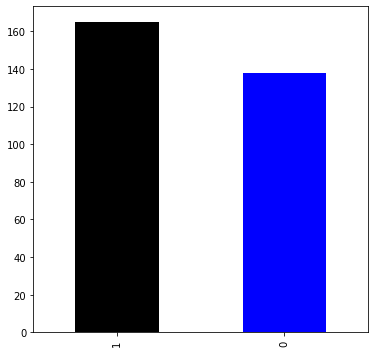

In [12]:
df["target"].value_counts().plot(kind = "bar",figsize = (6,6),color = ["black","blue"])

In [13]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

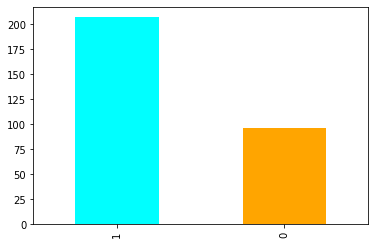

In [14]:
df['sex'].value_counts().plot(kind = "bar",color = ["cyan","orange"])

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


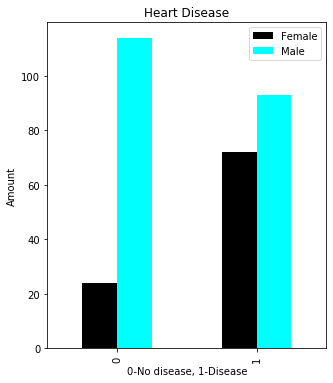

In [19]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",figsize = (5,6),color = ["black","cyan"])
plt.title("Heart Disease")
plt.xlabel("0-No disease, 1-Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.show()

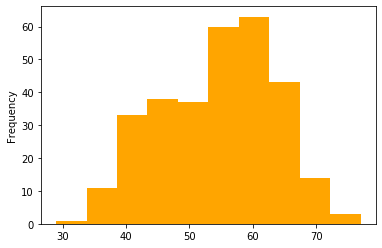

In [27]:
#check the distribution of age 

df.age.plot.hist(color = "orange")

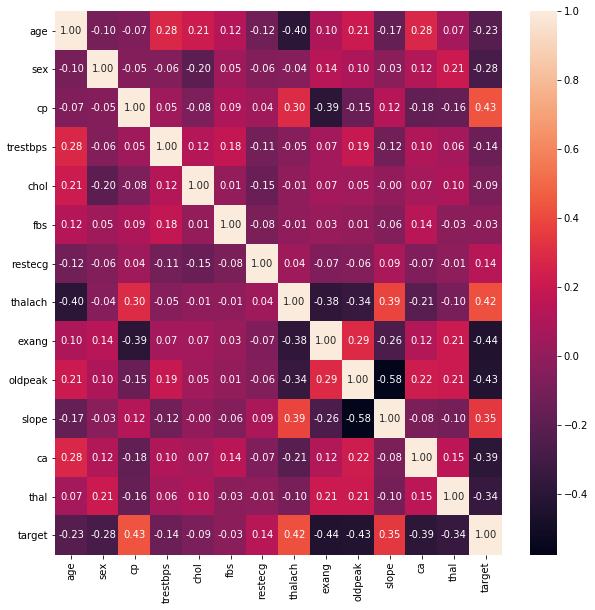

In [28]:
#visualize the correlation matrix

corr_mat = df.corr()

fig,ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr_mat,
                 annot = True,
                 fmt = ".2f")

In [29]:
#Spliting the data

np.random.seed(6)

X = df.drop(["target"],axis = 1)
y = df["target"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.631578947368421

* Knn with default parameter isn't performing so great.Lets improve our model..

## Improving model 

In [35]:
# Tune with K neighbors

training_score = []
test_score = []

knn = KNeighborsClassifier()

neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)
    training_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [36]:
training_score

[1.0,
 0.8193832599118943,
 0.8325991189427313,
 0.7929515418502202,
 0.775330396475771,
 0.762114537444934,
 0.7709251101321586,
 0.748898678414097,
 0.7224669603524229,
 0.7004405286343612,
 0.6960352422907489,
 0.7092511013215859,
 0.7048458149779736,
 0.7004405286343612,
 0.6872246696035242,
 0.6784140969162996,
 0.6872246696035242,
 0.6916299559471366,
 0.6828193832599119,
 0.6784140969162996]

In [37]:
test_score

[0.5263157894736842,
 0.5921052631578947,
 0.618421052631579,
 0.5921052631578947,
 0.631578947368421,
 0.6052631578947368,
 0.6447368421052632,
 0.6052631578947368,
 0.631578947368421,
 0.5789473684210527,
 0.631578947368421,
 0.5921052631578947,
 0.618421052631579,
 0.6052631578947368,
 0.618421052631579,
 0.6052631578947368,
 0.6447368421052632,
 0.6447368421052632,
 0.6447368421052632,
 0.6052631578947368]

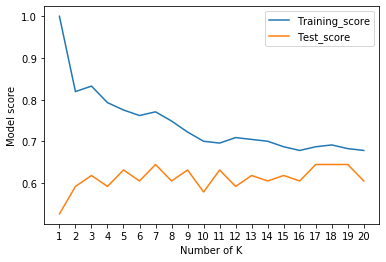

In [38]:
#visualize the result

plt.plot(neighbors,training_score,label = "Training_score")
plt.plot(neighbors,test_score,label = "Test_score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of K")
plt.ylabel("Model score")
plt.legend()
plt.show()

In [41]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [43]:
knn_grid = {"algorithm":["ball_tree","kd_tree"],
            "leaf_size":np.arange(10,51,10),
            "p":np.arange(1,4,1)}

knn_rs  = RandomizedSearchCV(KNeighborsClassifier(),
                             param_distributions = knn_grid,
                             cv = 5,
                             n_iter = 5,
                             verbose = True)

knn_rs.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': array([10, 20, 30, 40, 50]),
                                        'p': array([1, 2, 3])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [45]:
knn_rs.best_params_

{'p': 1, 'leaf_size': 40, 'algorithm': 'kd_tree'}

In [46]:
knn_rs.score(X_test,y_test)

0.631578947368421

In [47]:
#grid Search Cv

knn_grid_srch = GridSearchCV(KNeighborsClassifier(),
                             param_grid = knn_grid,
                             cv = 5,
                             verbose = True)

knn_grid_srch.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': array([10, 20, 30, 40, 50]),
                         'p': array([1, 2, 3])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [48]:
knn_grid_srch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 50, 'p': 1}

In [49]:
knn_grid_srch.score(X_test,y_test)

0.6447368421052632

# Evaluate the model

In [53]:
knn_clf = KNeighborsClassifier(algorithm="ball_tree",
                               leaf_size = 50,
                               p = 1)

#cross_val accuracy

knn_clf_cv = cross_val_score(knn_clf,
                             X,
                             y,
                             cv = 5,
                             scoring = "accuracy")


In [54]:
knn_clf_cv

array([0.72131148, 0.70491803, 0.62295082, 0.71666667, 0.65      ])

In [55]:
np.mean(knn_clf_cv)

0.6831693989071039

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

In [58]:
y_preds = knn_grid_srch.predict(X_test)

y_probs = knn_grid_srch.predict_proba(X_test)

y_positive = y_probs[:,1]
y_positive[:10]

array([0.8, 0.4, 0.6, 0.6, 0.8, 1. , 0. , 0.8, 0.8, 1. ])

In [59]:
fpr,tpr,threshold = roc_curve(y_test,y_positive)

In [61]:
roc_auc_score(y_test,y_positive)

0.6802083333333333

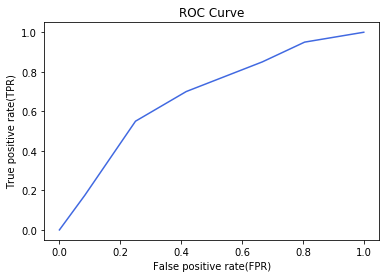

In [63]:
plt.plot(fpr,tpr,color = "royalblue",label = "ROC")
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve")
plt.show()

Text(15.0, 0.5, 'False label')

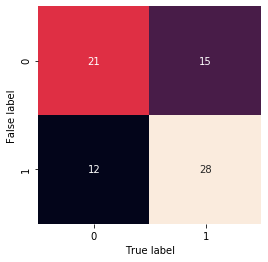

In [65]:
#visualize confusion matrix

fig,ax = plt.subplots(figsize = (4,4))
ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot = True,
                 cbar = False)
plt.xlabel("True label")
plt.ylabel("False label")